In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 4. Clase 7: Señales y sistemas</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Grabar su propia voz:

In [2]:
import pyaudio
import wave

chunk                  = 1024
formato                = pyaudio.paInt16
canales                = 1
tasa_sampleo           = 44100
segundos_grabados      = 5
nombre_archivo_salida  = "mivoz.wav"

p = pyaudio.PyAudio()

stream = p.open(format=formato,
                channels=canales,
                rate=tasa_sampleo,
                input=True,
                frames_per_buffer=chunk)

print("* grabando")

frames = []

for i in range(0, int(tasa_sampleo / chunk * segundos_grabados)):
    data = stream.read(chunk)
    frames.append(data)

print("* lista la grabación")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(nombre_archivo_salida, 'wb')
wf.setnchannels(canales)
wf.setsampwidth(p.get_sample_size(formato))
wf.setframerate(tasa_sampleo)
wf.writeframes(b''.join(frames))
wf.close()

* grabando
* lista la grabación


### Reproducir su propia voz:

Text(0, 0.5, 'amplitud')

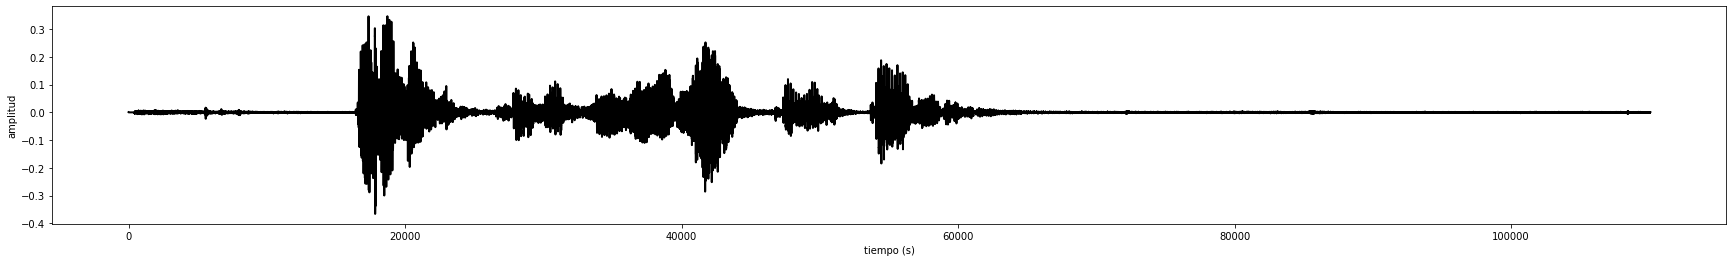

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display

from mpl_toolkits.mplot3d import Axes3D

x, sr = librosa.load('mivoz.wav')
ipd.Audio('mivoz.wav')

plt.figure(figsize=(30, 4))
baseline = plt.plot(x) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('tiempo (s)')
plt.ylabel('amplitud')


### Cortar silencios al inicio y término de la señal:

> + Uso sox: https://digitalcardboard.com/blog/2009/08/25/the-sox-of-silence/
> + Si queremos cortar los silencios existentes al inicio y término de una señal, entonces podemos usar SOX. En la carpeta donde está nuestro archivo de audio, abrir un terminal nuevo y ejecutar las dos siguientes líneas, una primero y después la siguiente:
>> * sox in.wav temp.wav silence 1 0.1 1% reverse
>> * sox temp.wav out.wav silence 1 0.1 1% reverse

In [33]:
xss, sr = librosa.load('mivozsinsilencios.wav')
ipd.Audio('mivozsinsilencios.wav')



Text(0, 0.5, 'amplitud')

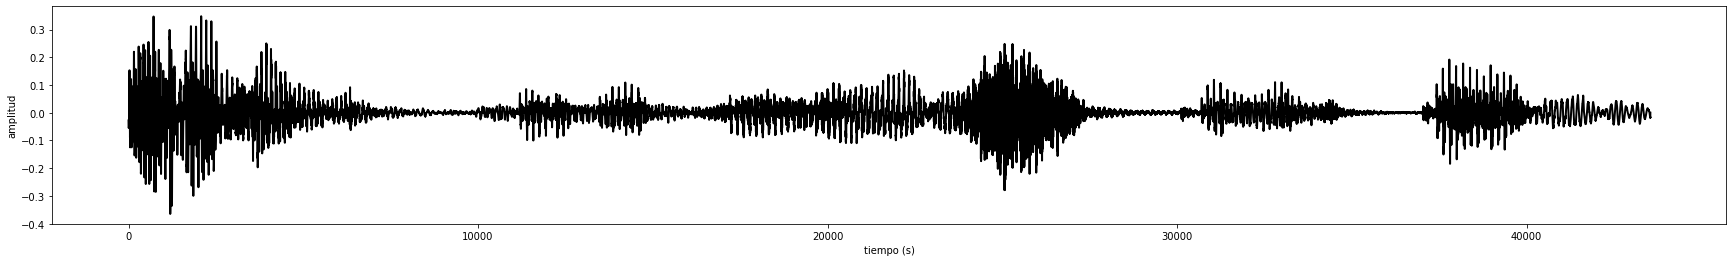

In [34]:
plt.figure(figsize=(30, 4))
baseline = plt.plot(xss) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('tiempo (s)')
plt.ylabel('amplitud')

### Señales de mi voz pero con diferentes profundidades de bits:

SNR: 34.952988 dB


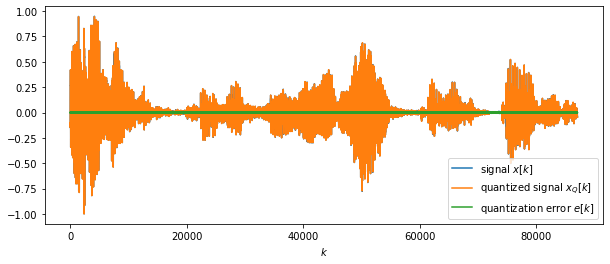

SNR: 23.052327 dB


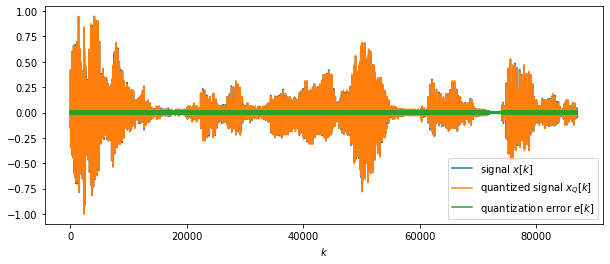

SNR: 11.775758 dB


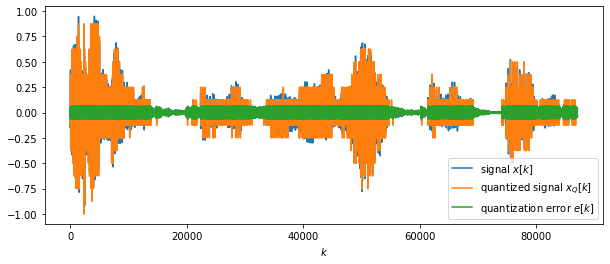

SNR: 3.211661 dB


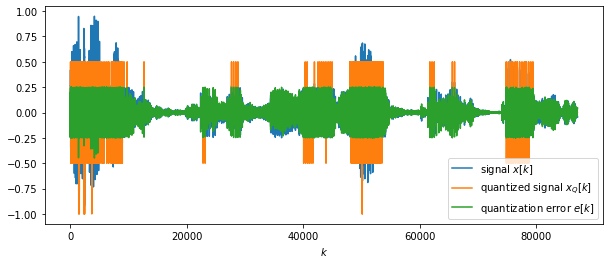

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

idx = 130000  # index to start plotting

def uniform_midtread_quantizer(x, w):
    # quantization step
    Q = 1/(2**(w-1))
    # limiter
    x = np.copy(x)
    idx = np.where(x <= -1)
    x[idx] = -1
    idx = np.where(x > 1 - Q)
    x[idx] = 1 - Q
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)
    
    return xQ

def evaluate_requantization(x, xQ):
    e = xQ - x
    # SNR
    SNR = 10*np.log10(np.var(x)/np.var(e))
    print('SNR: %f dB'%SNR)
    # plot signals
    #idx = 130000  # index to start plotting
    plt.figure(figsize=(10, 4))
    plt.plot(x, label=r'signal $x[k]$')
    plt.plot(xQ, label=r'quantized signal $x_Q[k]$')
    plt.plot(e, label=r'quantization error $e[k]$')
    plt.xlabel(r'$k$')
    plt.legend()
    plt.show()
    # normalize error
    e = .2 * e / np.max(np.abs(e))
    return e

# load speech sample: Original Signal
x, fs = sf.read('mivozsinsilencios.wav')
x = x/np.max(np.abs(x))

xQ = uniform_midtread_quantizer(x, 8)
e  = evaluate_requantization(x, xQ)
sf.write('speech_8bit.wav', xQ, fs)
sf.write('speech_8bit_error.wav', e, fs)

xQ = uniform_midtread_quantizer(x, 6)
e = evaluate_requantization(x, xQ)
sf.write('speech_6bit.wav', xQ, fs)
sf.write('speech_6bit_error.wav', e, fs)

xQ = uniform_midtread_quantizer(x, 4)
e = evaluate_requantization(x, xQ)
sf.write('speech_4bit.wav', xQ, fs)
sf.write('speech_4bit_error.wav', e, fs)

xQ = uniform_midtread_quantizer(x, 2)
e = evaluate_requantization(x, xQ)
sf.write('speech_2bit.wav', xQ, fs)
sf.write('speech_2bit_error.wav', e, fs)



In [36]:
ipd.Audio('speech_2bit.wav')

In [37]:
ipd.Audio('speech_4bit.wav')

In [38]:
ipd.Audio('speech_6bit.wav')

In [39]:
ipd.Audio('speech_8bit.wav')

43543


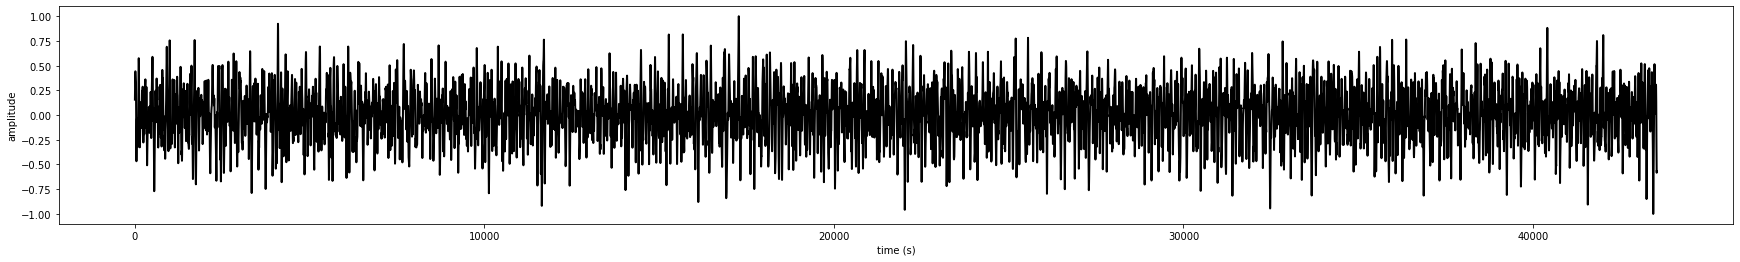

In [51]:
from scipy.io.wavfile import write

noise, sr = librosa.load('noisereference.wav')

noiset    = noise[0:len(xss)]

plt.figure(figsize=(30, 4))
baseline = plt.plot(noiset) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
ipd.Audio('noisereference.wav')
Lnoiset = len(noiset)
print(Lnoiset)

In [60]:
nombre_archivo_salida  = "mivozmasruido.wav"

y = xss + 0.075*noiset
write(nombre_archivo_salida, sr, y)

In [61]:
ipd.Audio(nombre_archivo_salida)

Text(0, 0.5, 'amplitud')

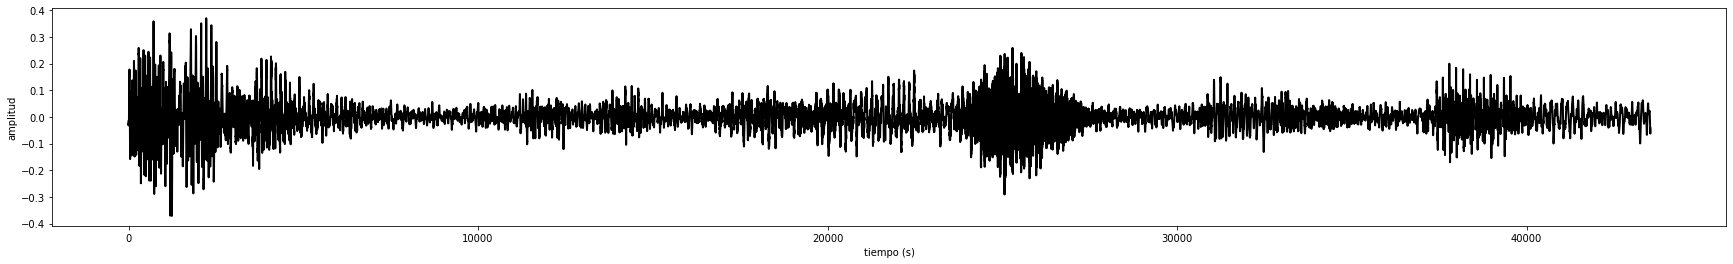

In [62]:
plt.figure(figsize=(30, 4))
baseline = plt.plot(y) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('tiempo (s)')
plt.ylabel('amplitud')

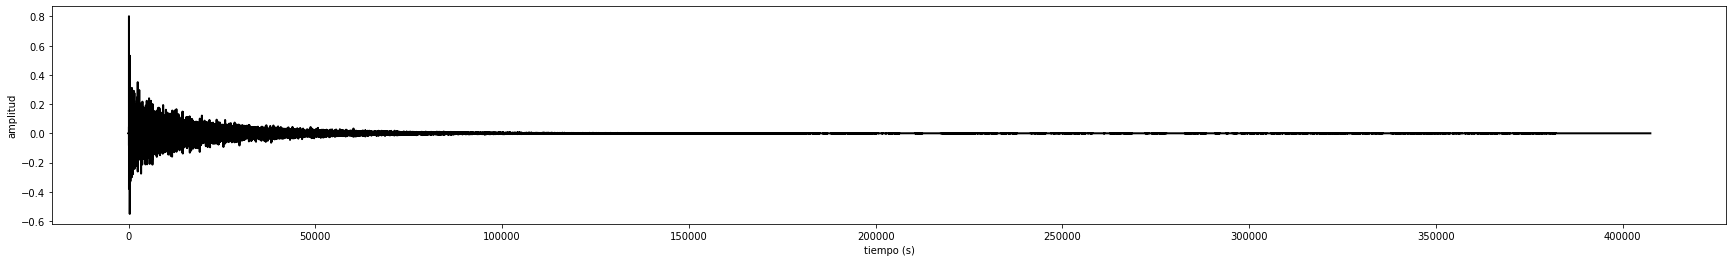

In [63]:
rev, sr = librosa.load('ImpS1Amp.wav')

plt.figure(figsize=(30, 4))
baseline = plt.plot(rev) 
plt.setp(baseline, color='k', linewidth=2)
plt.xlabel('tiempo (s)')
plt.ylabel('amplitud')
ipd.Audio('ImpS1Amp.wav')
